# Python Final Project: Machine Learning on Heart Disease

In [42]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import normalize,scale
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from scipy import optimize # neural network
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.cross_validation import KFold

In [41]:
data = pd.read_csv('heart.csv', header=None)
df = pd.DataFrame(data)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,55,0,2,135,250,0,2,161,0,1.4,2,0,3,1
1,59,1,3,150,212,1,0,157,0,1.6,1,0,3,1
2,41,0,2,105,198,0,0,168,0,0.0,1,1,3,1
3,66,1,4,160,228,0,2,138,0,2.3,1,0,6,1
4,40,1,1,140,199,0,0,178,1,1.4,1,0,7,1
5,59,1,1,160,273,0,2,125,0,0.0,1,0,3,2
6,55,1,4,140,217,0,0,111,1,5.6,3,0,7,2
7,58,1,4,125,300,0,2,171,0,0.0,1,2,7,2
8,45,0,2,112,160,0,0,138,0,0.0,2,0,3,1
9,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2


# Model 1: Naive Bayes

10-Fold Accuracy :  77.0739348371
[[ 0.44444444  0.10229277]
 [ 0.13932981  0.31393298]]
             precision    recall  f1-score   support

          0       0.76      0.81      0.79       310
          1       0.75      0.69      0.72       257

avg / total       0.76      0.76      0.76       567



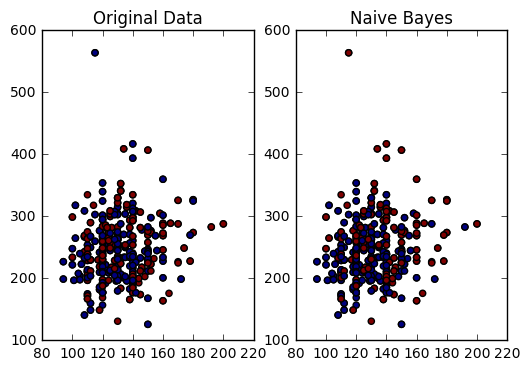

In [3]:
x = df.iloc[:, 0:13]
y = df.iloc[:, 13]
y = y-1

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(x[3],x[4], c=y)
ax1.set_title("Original Data")

model = MultinomialNB()

scores = cross_val_score(model, x, y, scoring='accuracy', cv=10)
print ("10-Fold Accuracy : ", scores.mean()*100)

model.fit(x_train,y_train)
predicts = model.predict(x)

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(x[3],x[4], c=predicts)
ax2.set_title("Naive Bayes")

cm = metrics.confusion_matrix(y, predicts)
print (cm/len(x))
print (metrics.classification_report(y, predicts))
plt.show()

K-Means Clustering

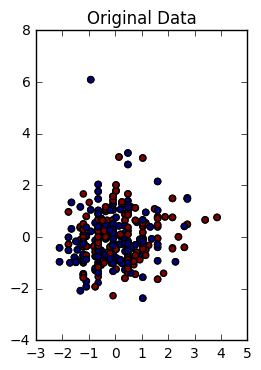

In [4]:
x = df.iloc[:, 0:5]
x = x.drop(x.columns[1:3], axis=1)
x = pd.DataFrame(scale(x))

y = df.iloc[:, 13]
y = y-1

fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
ax1.scatter(x[1],x[2], c=y)
ax1.set_title("Original Data")

In [33]:
clusters = 2

model = KMeans(init='k-means++', n_clusters=clusters, n_init=10,random_state=100)

scores = cross_val_score(model, x, y, scoring='accuracy', cv=10)
print ("10-Fold Accuracy : ", scores.mean()*100)

model.fit(x)

predicts = model.predict(x)
print ("Accuracy(Total) = ", sum(predicts == np.array(y))/(len(y)*1.0))

10-Fold Accuracy :  50.8333333333
Accuracy(Total) =  0.624338624339


[[ 0.31569665  0.23104056]
 [ 0.14462081  0.30864198]]
             precision    recall  f1-score   support

          0       0.69      0.58      0.63       310
          1       0.57      0.68      0.62       257

avg / total       0.63      0.62      0.62       567



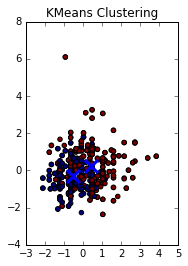

In [11]:
centroids = model.cluster_centers_
fig = plt.figure()
ax1.scatter(centroids[:, 1], centroids[:, 2],
            marker='x', s=169, linewidths=3,
            color='b', zorder=10)

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("KMeans Clustering")
ax2.scatter(x[1],x[2], c=predicts)
ax2.scatter(centroids[:, 1], centroids[:, 2],
            marker='x', s=169, linewidths=3,
            color='b', zorder=10)
cm = metrics.confusion_matrix(y, predicts)
print (cm/len(y))
print (metrics.classification_report(y, predicts))

plt.show()

Kmeans Clustering with Naive Bayes Classifier

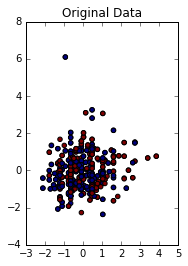

In [27]:
fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
ax1.scatter(x[1],x[2], c=y)
ax1.set_title("Original Data")
FP = 0
FN = 0
TN = 0
TP = 0

In [28]:
def nbkmh(train_index, test_index):
	x_kmeans = df.iloc[:, 0:5]
	x_kmeans = x_kmeans.drop(x_kmeans.columns[1:3], axis=1)
	x_kmeans = pd.DataFrame(scale(x_kmeans))

	x_naive = df.iloc[:, 0:13]
	y = df.iloc[:, 13]
	y = y-1

	y_train = pd.Series(y.iloc[train_index])
	y_test = pd.Series(y.iloc[test_index])

	x_train_kmeans = x_kmeans.iloc[train_index, :]
	x_test_kmeans = x_kmeans.iloc[test_index, :]

	x_train_naive = x_naive.iloc[train_index, :]
	x_test_naive = x_naive.iloc[test_index, :]
    
	clusters = 5
	model_kmeans = KMeans(init='k-means++', n_clusters=clusters, n_init=10,random_state=10000)
	model_kmeans.fit(x_train_kmeans)
	kmean_predictions = model_kmeans.predict(x_train_kmeans)

	x = [pd.DataFrame() for ii in range(0,clusters)]
	y = [pd.Series() for ii in range(0,clusters)]
	iterators = zip(kmean_predictions,range(len(x_train_kmeans)))
	for kmean_prediction,i in iterators:
		row_x =  x_train_naive.iloc[i, :]
		row_y = pd.Series(y_train.iloc[i])
		index = int(kmean_prediction)
		x[index] = x[index].append(row_x, ignore_index=True)
		y[index] = y[index].append(row_y)
    
	clstr_n = [MultinomialNB(alpha=2,fit_prior=True) for ii in range(0,clusters)]
	for i in range(0,clusters):
		clstr_n[i].fit(x[i], y[i])

	predicts = []
	c=0
	for i in range(len(x_test_kmeans)):
		prediction = model_kmeans.predict(
                    x_test_kmeans.iloc[i, :].reshape(1,-1))
		prediction = int(prediction)
		pred_naive = clstr_n[prediction].predict(
                    x_test_naive.iloc[i, :].reshape(1,-1))
		predicts.append(pred_naive)
		if pred_naive == y_test.iloc[i]:
			c+=1
	print ((c*100.0)/len(x_test_kmeans))

	predicts = np.array(predicts)
	cm = metrics.confusion_matrix(y_test, predicts)/len(y_test)
	# print (cm)
	global FP
	global FN
	global TN
	global TP
	FP += cm[0][0]
	FN += cm[1][0]
	TN += cm[0][1]
	TP += cm[1][1]
	return ((c*100.0)/len(x_test_kmeans))


In [29]:
def main():
	scores = []
	kf = KFold(n=df.shape[0], n_folds=10)
	for (train_index,test_index),i in zip(kf,range(0,10)):
		print("Iteration " + str(i+1) + " : ")
		scores.append(nbkmh(train_index, test_index))
	print("\n 10 Fold Accuracy",np.array(scores).mean())
	print("FP", FP*10)
	print("FN", FN*10)
	print("TN", TN*10)
	print("TP", TP*10)

if __name__ == '__main__':
	main()

Iteration 1 : 
78.94736842105263
Iteration 2 : 
77.19298245614036
Iteration 3 : 
89.47368421052632
Iteration 4 : 
87.71929824561404
Iteration 5 : 
85.96491228070175
Iteration 6 : 
82.45614035087719
Iteration 7 : 
70.17543859649123
Iteration 8 : 
83.92857142857143
Iteration 9 : 
85.71428571428571
Iteration 10 : 
80.35714285714286

 10 Fold Accuracy 82.1929824561
FP 47.0895989975
FN 10.2161654135
TN 7.59085213033
TP 35.1033834586


KNN

In [31]:
x = df.iloc[:, 0:5]
x = x.drop(x.columns[1:3], axis=1)
x = pd.DataFrame(scale(x))

y = df.iloc[:, 13]
y = y-1

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

In [32]:
model = KNeighborsClassifier(n_neighbors=5)

scores = cross_val_score(model, x, y, scoring='accuracy', cv=10)
print ("10-Fold Accuracy : ", scores.mean()*100)

model.fit(x_train,y_train)
print ("Testing Accuracy : ",model.score(x_test, y_test)*100)
predicted = model.predict(x)

10-Fold Accuracy :  68.787593985
Testing Accuracy :  66.0792951542


[[ 0.37742504  0.16931217]
 [ 0.11640212  0.33686067]]
             precision    recall  f1-score   support

          0       0.76      0.69      0.73       310
          1       0.67      0.74      0.70       257

avg / total       0.72      0.71      0.71       567



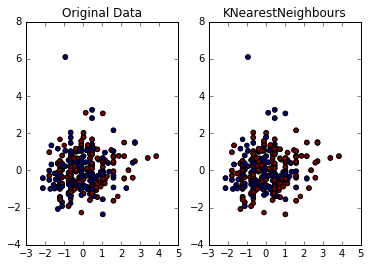

In [33]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(x[1],x[2], c=y)
ax1.set_title("Original Data")

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(x[1],x[2], c=predicted)
ax2.set_title("KNearestNeighbours")

cm = metrics.confusion_matrix(y, predicted)
print (cm/len(y))
print (metrics.classification_report(y, predicted))

plt.show()

Fuzzy KNN

In [36]:
x = df.iloc[:, 0:5]
x = x.drop(x.columns[1:3], axis=1)
x = pd.DataFrame(scale(x))

y = df.iloc[:, 13]
y = y-1

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

In [37]:
model = KNeighborsClassifier(n_neighbors=5, weights='distance')

scores = cross_val_score(model, x, y, scoring='accuracy', cv=10)
print ("10-Fold Accuracy : ", scores.mean()*100)

model.fit(x_train,y_train)
print ("Testing Accuracy : ",model.score(x_test, y_test)*100)
predicted = model.predict(x)

10-Fold Accuracy :  94.1979949875
Testing Accuracy :  79.7356828194


[[ 0.4973545   0.04938272]
 [ 0.03174603  0.42151675]]
             precision    recall  f1-score   support

          0       0.94      0.91      0.92       310
          1       0.90      0.93      0.91       257

avg / total       0.92      0.92      0.92       567



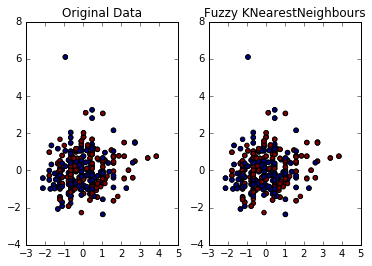

In [39]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(x[1],x[2], c=y)
ax1.set_title("Original Data")

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(x[1],x[2], c=predicted)
ax2.set_title("Fuzzy KNearestNeighbours")

cm = metrics.confusion_matrix(y, predicted)
print (cm/len(y))
print (metrics.classification_report(y, predicted))


plt.show()

Logistic Regression

In [40]:
x = df.iloc[:, 0:13]
y = df.iloc[:, 13]
y = y-1
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

In [41]:
c = 3
model = LogisticRegression(C = c)


scores = cross_val_score(model, x, y, scoring='accuracy', cv=10)
print ("10-Fold Accuracy : ", scores.mean()*100)

model = model.fit(x_train,y_train)
print ("Testing Accuracy : ",model.score(x_test, y_test)*100)
predicted = model.predict(x)

10-Fold Accuracy :  84.8339598997
Testing Accuracy :  83.7004405286


[[ 0.47971781  0.0670194 ]
 [ 0.08818342  0.36507937]]
             precision    recall  f1-score   support

          0       0.84      0.88      0.86       310
          1       0.84      0.81      0.82       257

avg / total       0.84      0.84      0.84       567



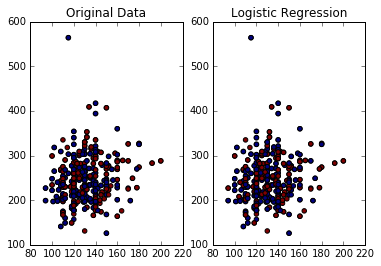

In [42]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(x[3],x[4], c=y)
ax1.set_title("Original Data")

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(x[3],x[4], c=predicted)
ax2.set_title("Logistic Regression")

cm = metrics.confusion_matrix(y, predicted)
print (cm/len(y))
print (metrics.classification_report(y, predicted))

plt.show()

Neural Network

In [43]:
def featureNormalize(z):
    return scale(z)
def sigmoid(z):
    r = 1.0 / (1.0 + np.exp(-z))
    return r
def sigmoidGrad(z):
    r = sigmoid(z)
    r = r * (1.0 - r)
    return r
def randomizeTheta(l, epsilon):
    return ((np.random.random((l, 1)) * 2 * epsilon) - epsilon)

def KFoldDiv(X, y, m, n, K):
    sz = int(np.ceil(m / K))
    if n == 1:
        X_train = X[sz:, :]
        X_test = X[:sz, :]
        y_train = y[sz:]
        y_test = y[:sz]
    elif n == K:
        X_train = X[:((n-1)*sz), :]
        X_test = X[((n-1)*sz):, :]
        y_train = y[:((n-1)*sz)]
        y_test = y[((n-1)*sz):]
    else:
        X_train = np.vstack((X[:((n-1)*sz), :], X[(n*sz):, :]))
        X_test = X[((n-1)*sz):(n*sz), :]
        y_train = np.vstack((y[:((n-1)*sz)], y[(n*sz):]))
        y_test = y[((n-1)*sz):(n*sz)]
    return (X_train, y_train, X_test, y_test)

In [44]:
def nnCostFunc(Theta, input_layer_size, hidden_layer_size, num_labels, X, y, lmbda):
    Theta1, Theta2 = np.split(Theta, [hidden_layer_size * (input_layer_size+1)])
    Theta1 = np.reshape(Theta1, (hidden_layer_size, input_layer_size+1))
    Theta2 = np.reshape(Theta2, (num_labels, hidden_layer_size+1))
    m = X.shape[0]
    y = (y == np.array([(i+1) for i in range(num_labels)])).astype(int)

    a1 = np.hstack((np.ones((m, 1)), X))
    z2 = np.dot(a1, Theta1.T)
    a2 = np.hstack((np.ones((m, 1)), sigmoid(z2)))
    h = sigmoid(np.dot(a2, Theta2.T))

    cost = ((lmbda/2)*(np.sum(Theta1[:, 1:] ** 2) +
            np.sum(Theta2[:, 1:] ** 2)) -
            np.sum((y * np.log(h)) +
            ((1-y) * np.log(1-h)))) / m
    return cost

In [45]:
def nnGrad(Theta, input_layer_size, hidden_layer_size, num_labels, X, y, lmbda):
    Theta1, Theta2 = np.split(Theta, [hidden_layer_size * (input_layer_size+1)])
    Theta1 = np.reshape(Theta1, (hidden_layer_size, input_layer_size+1))
    Theta2 = np.reshape(Theta2, (num_labels, hidden_layer_size+1))
    m = X.shape[0]
    y = (y == np.array([(i+1) for i in range(num_labels)])).astype(int)

    a1 = np.hstack((np.ones((m, 1)), X))
    z2 = np.dot(a1, Theta1.T)
    a2 = np.hstack((np.ones((m, 1)), sigmoid(z2)))
    h = sigmoid(np.dot(a2, Theta2.T))

    delta_3 = h - y
    delta_2 = np.dot(delta_3, Theta2[:, 1:]) * sigmoidGrad(z2)
    Theta2_grad = (np.dot(delta_3.T, a2) + 
                   (lmbda * np.hstack((np.zeros((Theta2.shape[0], 1)),
                                       Theta2[:, 1:])))) / m
    Theta1_grad = (np.dot(delta_2.T, a1) +
                   (lmbda * np.hstack((np.zeros((Theta1.shape[0], 1)),
                                       Theta1[:, 1:])))) / m

    grad = np.hstack((Theta1_grad.flatten(), Theta2_grad.flatten()))
    return grad

In [46]:
K = 10
lmbda = 0.03
epsilon = 0.12

input_layer_size = 13
hidden_layer_size = 20
num_labels = 2

In [47]:
X = np.genfromtxt('heart.csv', delimiter=',')
m, n = X.shape
n -= 1

y = X[:, n].astype(int).reshape((m, 1))
X = featureNormalize(X[:, :n])
foldAcc = np.ndarray((K, 1))

In [48]:
FP = 0
FN = 0
TN = 0
TP = 0
for i in range(K):
    X_train, y_train, X_test, y_test = KFoldDiv(X, y, m, i+1, K)
    
    initTheta = randomizeTheta((hidden_layer_size * (input_layer_size+1)) +
                               (num_labels * (hidden_layer_size+1)), epsilon)
    Theta = optimize.fmin_bfgs(nnCostFunc, initTheta, fprime=nnGrad,
                               args=(input_layer_size,
                                     hidden_layer_size,
                                     num_labels, X_train,
                                     y_train,
                                     lmbda),
                               maxiter=3000)
    Theta1, Theta2 = np.split(Theta, [hidden_layer_size * (input_layer_size+1)])
    Theta1 = np.reshape(Theta1, (hidden_layer_size, input_layer_size+1))
    Theta2 = np.reshape(Theta2, (num_labels, hidden_layer_size+1))

    h1 = sigmoid(np.dot(np.hstack((np.ones((X_test.shape[0], 1)), X_test)), Theta1.T))
    h2 = sigmoid(np.dot(np.hstack((np.ones((h1.shape[0], 1)), h1)), Theta2.T))
    predicted = h2.argmax(1) + 1
    predicted = predicted.reshape((predicted.shape[0], 1))
    foldAcc[i] = np.mean((predicted == y_test).astype(float)) * 100

    cm = (metrics.confusion_matrix(y_test, predicted))/len(y_test)

    FP += cm[0][0]
    FN += cm[1][0]
    TN += cm[0][1]
    TP += cm[1][1]

    print('Test Set Accuracy for %dth fold: %f\n' % (i+1, foldAcc[i]))
meanAcc = np.mean(foldAcc)
print('\nAverage Accuracy: ', meanAcc)
print("")
print(FP)
print(FN)
print(TN)
print(TP)

Optimization terminated successfully.
         Current function value: 0.042356
         Iterations: 1060
         Function evaluations: 1062
         Gradient evaluations: 1062
Test Set Accuracy for 1th fold: 100.000000

Optimization terminated successfully.
         Current function value: 0.041036
         Iterations: 1532
         Function evaluations: 1538
         Gradient evaluations: 1538
Test Set Accuracy for 2th fold: 98.245614

Optimization terminated successfully.
         Current function value: 0.043393
         Iterations: 1381
         Function evaluations: 1385
         Gradient evaluations: 1385
Test Set Accuracy for 3th fold: 96.491228

Optimization terminated successfully.
         Current function value: 0.044102
         Iterations: 1179
         Function evaluations: 1182
         Gradient evaluations: 1182
Test Set Accuracy for 4th fold: 96.491228

Optimization terminated successfully.
         Current function value: 0.040190
         Iterations: 1103
         